# KNN Classification and Regression model

In [2]:
# Importing necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub as kh

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


## Loading, Defining and Understanding the Dataset

In [4]:
# Load the dataset
path = kh.dataset_download("denkuznetz/taxi-price-prediction")
df = pd.read_csv(f'{path}/taxi_trip_pricing.csv')

In [5]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [7]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [8]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [9]:
df['Day_of_Week'].value_counts()

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

In [10]:
df['Time_of_Day'].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [11]:
df['Weather'].value_counts()

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

In [12]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## Visualization

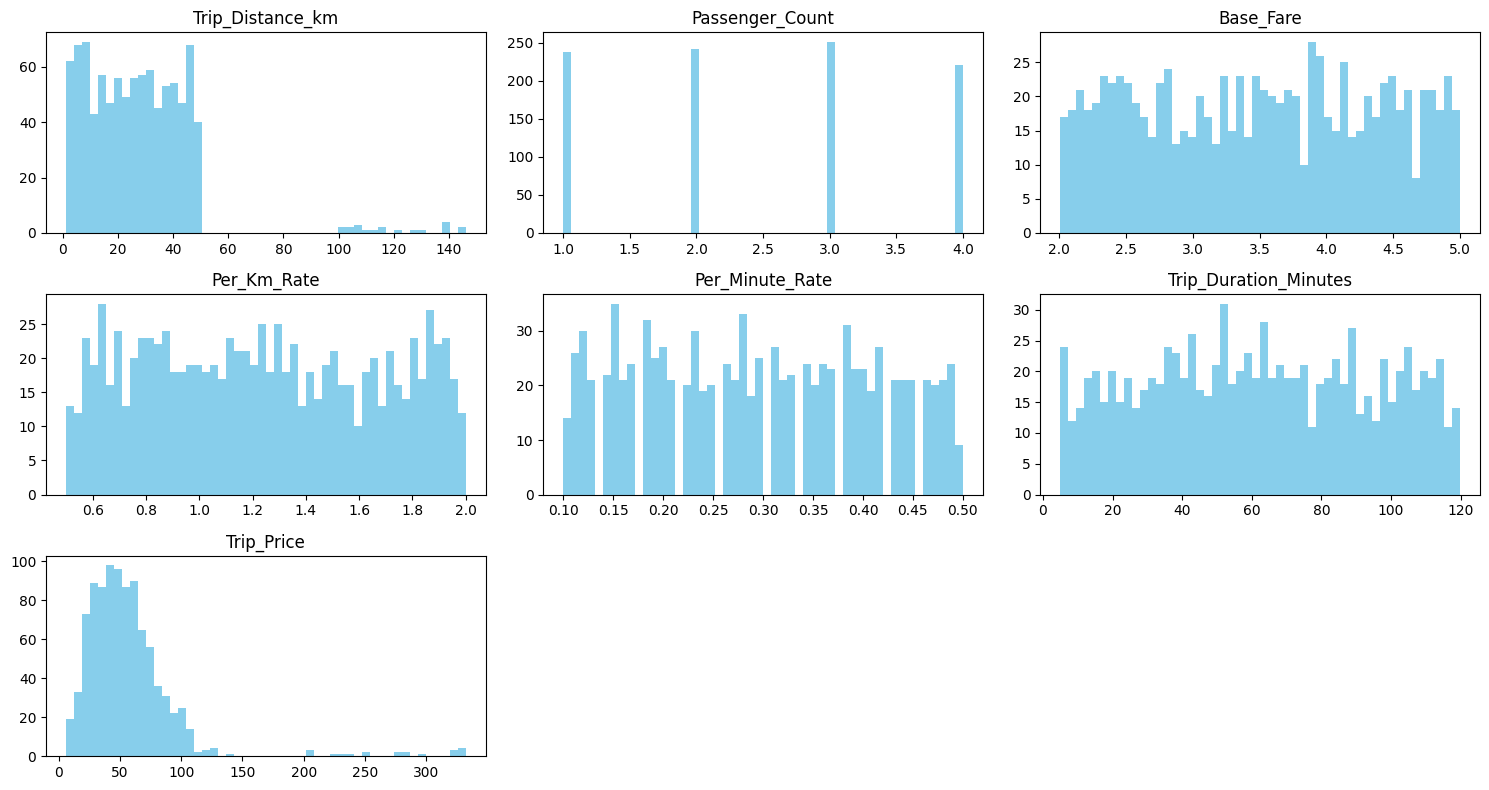

In [13]:
# Histogram
df.select_dtypes(include=[np.number]).hist(figsize=(15,8), bins=50, grid=False, color='skyblue')
plt.tight_layout()
plt.show()

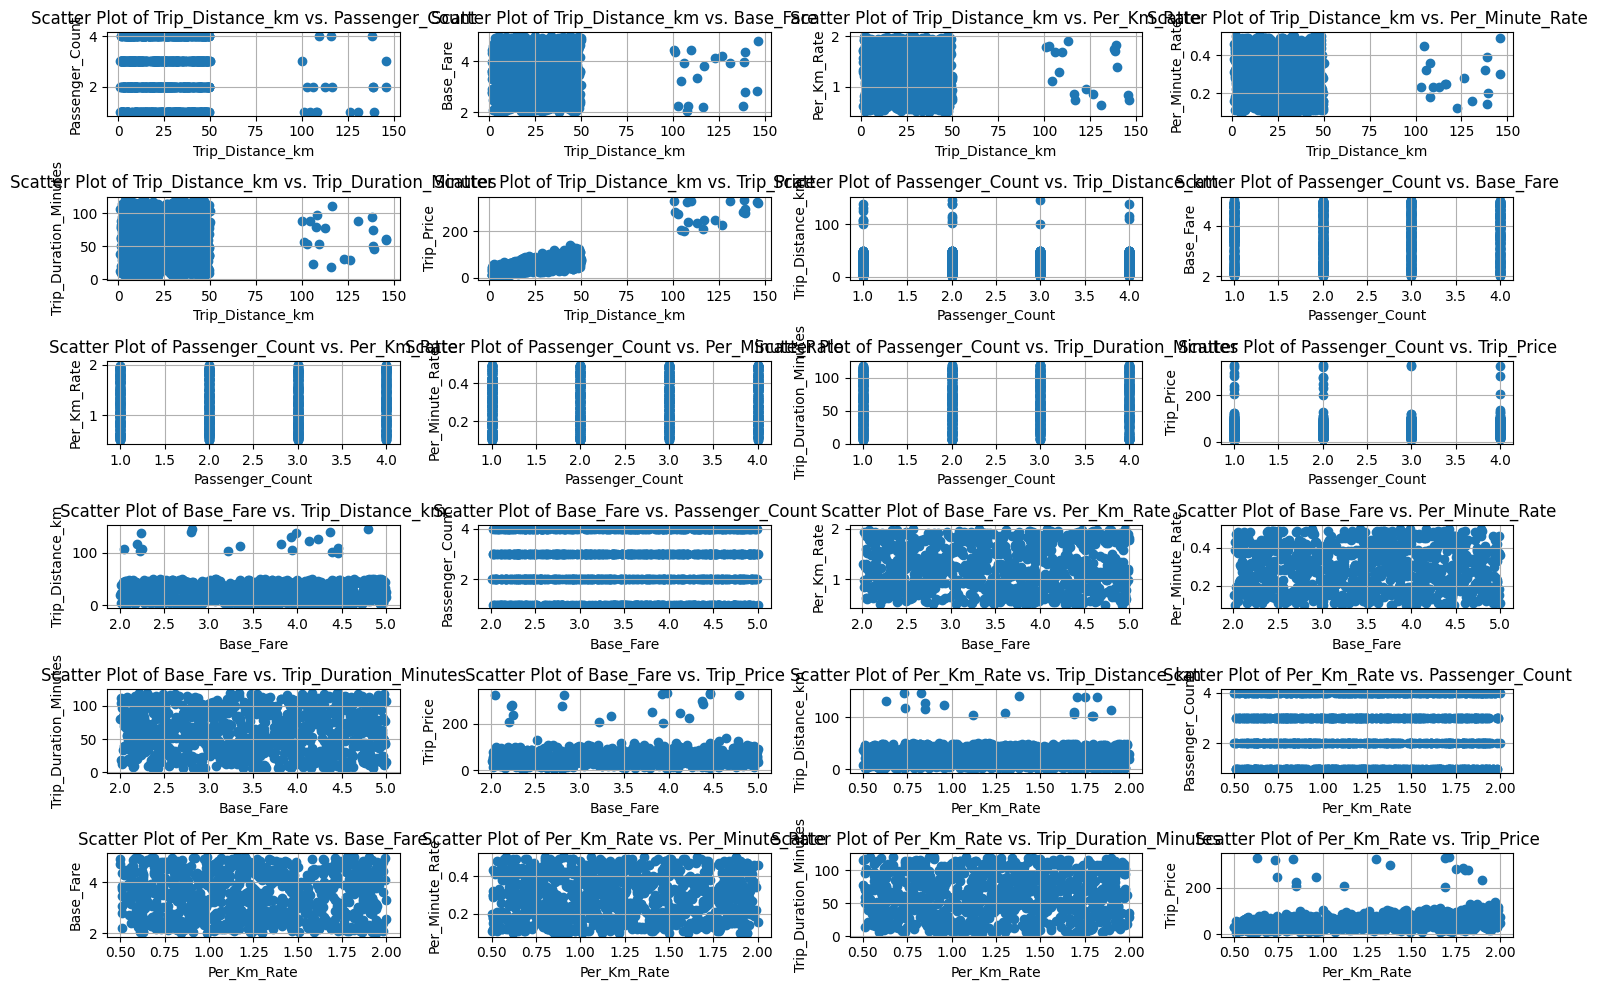

In [14]:
# Scatter plots
columns_to_plot = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(6, 4, figsize=(15, 10))

axes = axes.flatten()

index = 0
for col1 in columns_to_plot:
    for col2 in columns_to_plot:
        if col1 != col2 and index < len(axes):
            axes[index].scatter(df[col1], df[col2])
            axes[index].set_xlabel(col1)
            axes[index].set_ylabel(col2)
            axes[index].set_title(f'Scatter Plot of {col1} vs. {col2}')
            axes[index].grid(True)
            index += 1

for i in range(index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Preprocessing

In [15]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [16]:
# Imputer of missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[df.select_dtypes(include=[np.number]).columns] = num_imputer.fit_transform(df[df.select_dtypes(include=[np.number]).columns])
df[df.select_dtypes(include=[object]).columns] = cat_imputer.fit_transform(df[df.select_dtypes(include=[object]).columns])

In [17]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [18]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000


In [19]:
# Splitting the dataset into X and y
X = df.drop('Trip_Price', axis=1)
y = df['Trip_Price']

In [20]:
# Splitting the dataset into num and cat
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=[object]).columns

In [21]:
num_cols

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype='object')

In [22]:
cat_cols

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

### Pipeline

In [23]:
# Preparing to transform
num_trans = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_trans = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [24]:
# Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, num_cols),
    ('cat', cat_trans, cat_cols)
])

In [25]:
# Creating full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsRegressor(n_neighbors=5))
])

## Training and Evaluating the Model

### Training the model

In [26]:
# Splitting data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Fitting the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object'))])),
                ('classifier', KNeighborsRegressor())])

In [28]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

### Evaluating the model

In [29]:
# RMSE
rmse = root_mean_squared_error(y_test, y_pred)
rmse

13.144008629274397

In [30]:
# R2 Score
r2 = r2_score(y_test, y_pred)
r2

0.7919406976461053

## Choosing the Best K

In [34]:
# List of K values to try
k_values = range(1, 21)

# Store the cross-validation scores for each K
cv_scores = []

# Perform cross-validation for each K
for k in k_values:
    pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsRegressor(n_neighbors=k))
    ])
    scores = cross_val_score(pipe_knn, X_train, y_train, cv=10, scoring='r2')
    cv_scores.append(np.mean(scores))

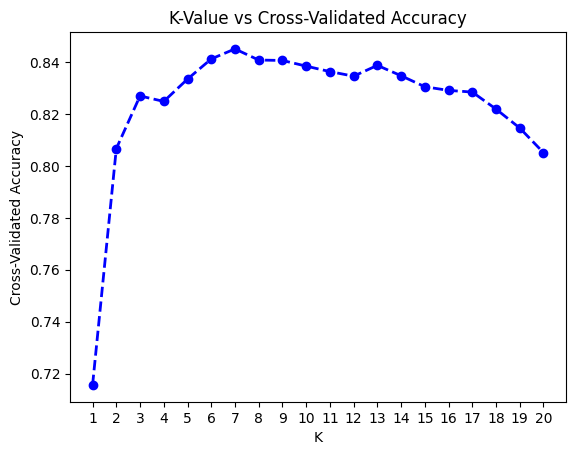

Best value of K: 7


In [35]:
# Plotting the results
plt.plot(k_values, cv_scores, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.title('K-Value vs Cross-Validated Accuracy')
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)
plt.show()

# Find the best K
best_k = k_values[np.argmax(cv_scores)]
print(f"Best value of K: {best_k}")

### Training the model with the best K

In [36]:
pipe_best_k = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsRegressor(n_neighbors=7))
])

In [37]:
# Fitting the model
pipe_best_k.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object'))])),
                ('classifier', KNeighborsRegressor(n_neighbors=7))])

In [38]:
# Predict on the test set
y_pred_best_k = pipe_best_k.predict(X_test)

In [42]:
# RMSE
rmse_best_k = root_mean_squared_error(y_test, y_pred_best_k)
rmse_best_k

13.059290989570327

In [43]:
# R2 Score
r2_best_k = r2_score(y_test, y_pred_best_k)
r2_best_k

0.7946140813542547